In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os

In [2]:
s_state = np.load("data/s_state_original_code.npy")
final_val_as_euler = np.load("data/sp4_after_sim.npy")
final_val_as_rk23 = np.load("eval_data/as_last_rk23_2.npy")
final_val_as_rk45 = np.load("eval_data/as_last_rk45_2.npy")
s_state_mumax = np.load("eval_data/mumax3_s-state.npy").transpose(3,2,1,0)
final_val_as_mx3= np.load("eval_data/mumax3_sp4_res.npy").transpose(3,2,1,0)

print(s_state.shape)
print(s_state_mumax.shape)

(100, 25, 1, 3)
(100, 25, 1, 3)


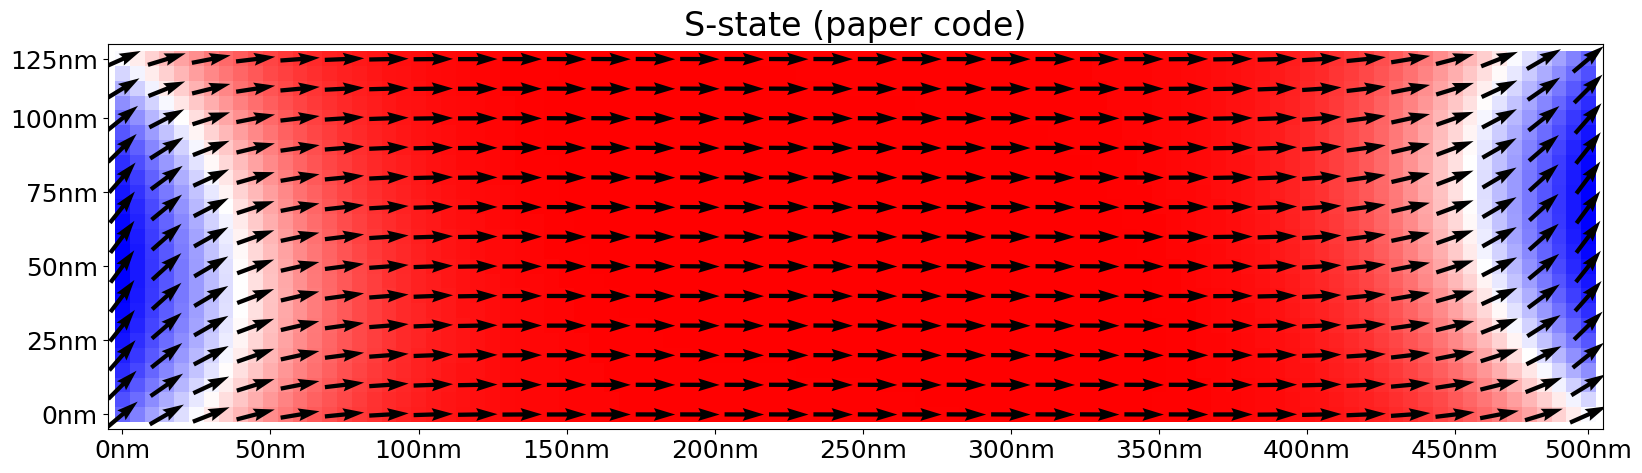

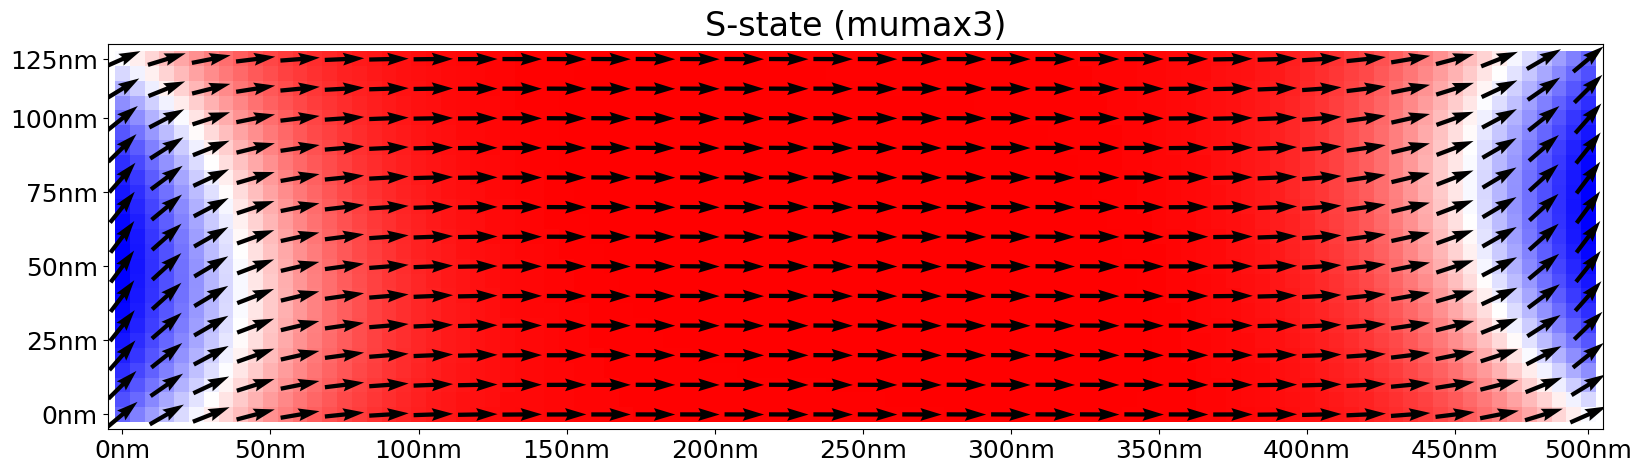

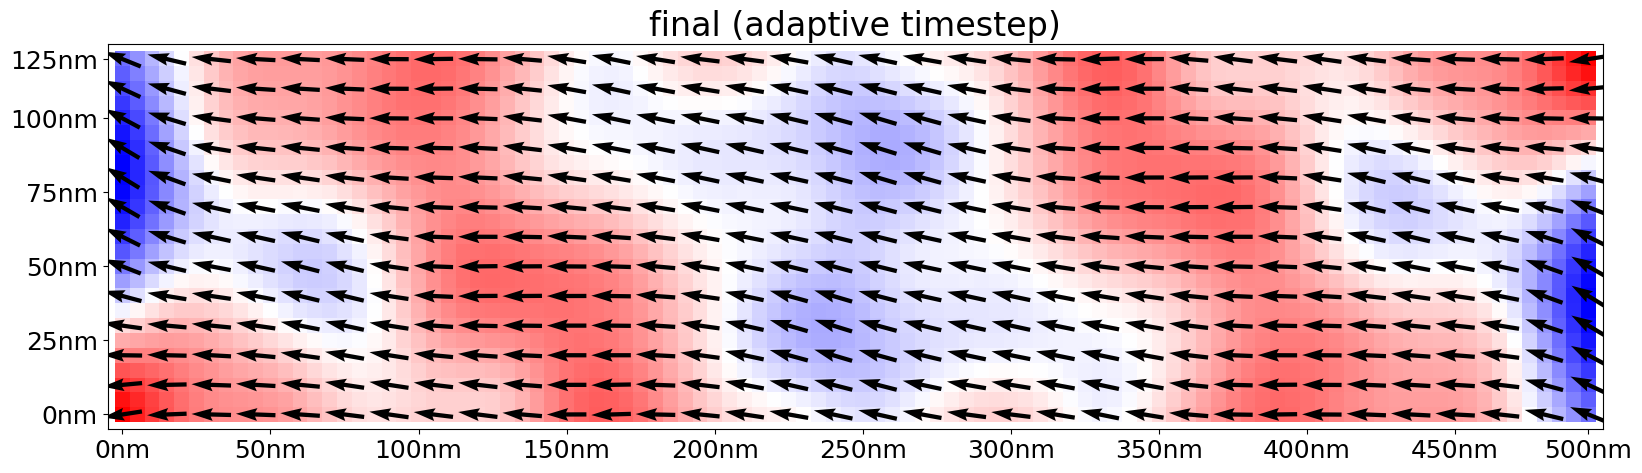

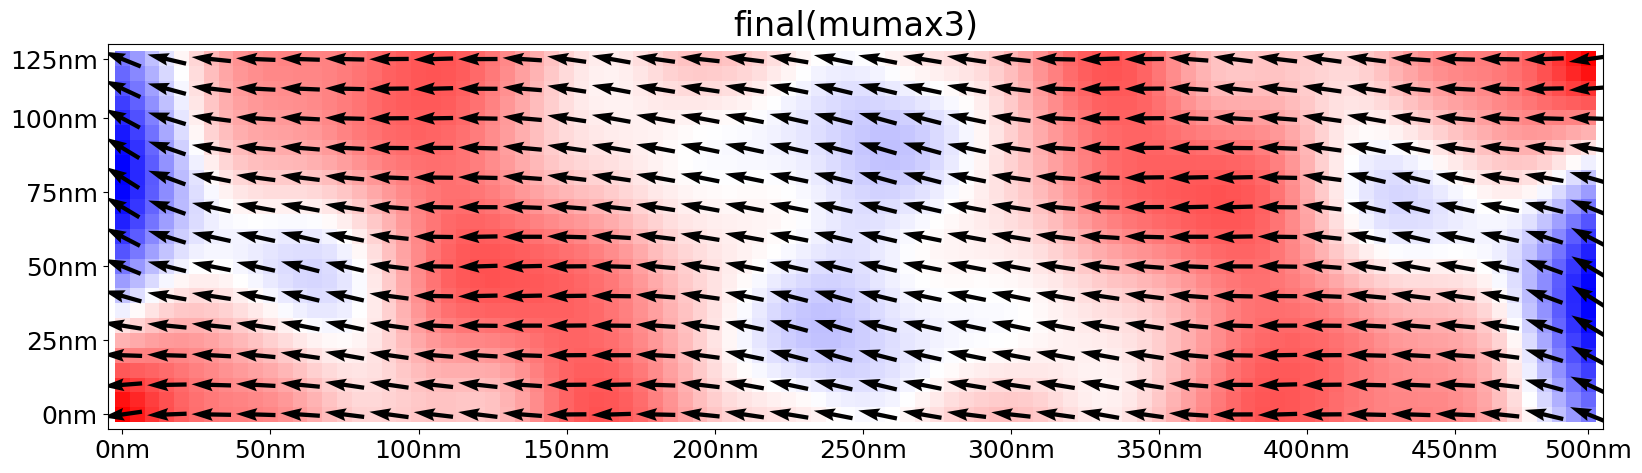

In [4]:
def plot_thin_film(data, name, ticks_fs = 18, title_fs=24):
    s_state_to_plot = data[::-1, :, 0, :]

    xs = np.arange(s_state_to_plot.shape[0])
    ys = np.arange(s_state_to_plot.shape[1]) 

    x_every = 3
    y_every = 2

    xs, ys = np.meshgrid(xs[::x_every], ys[::y_every])

    s = 5
    plt.figure(figsize=(s * 4, s))
    plt.title(name, fontsize=title_fs)
    #plt.quiver(xs.T[::-1], ys.T, s_state_to_plot[::x_every,::y_every,0], s_state_to_plot[::x_every,::y_every,1])
    plt.quiver(xs.T[::-1], ys.T, s_state_to_plot[::x_every,::y_every,0], s_state_to_plot[::x_every,::y_every,1], pivot="mid")
    plt.imshow(1-s_state_to_plot[::-1,:,1].T, cmap="bwr")
    plt.xlim(-1, 100)
    plt.ylim(-1, 25)
    plt.xticks([0, 10, 20, 30, 40, 50, 60, 70,80, 90, 99], ["0nm", "50nm", "100nm", "150nm", "200nm", "250nm", "300nm", "350nm", "400nm", "450nm", "500nm"], fontsize=ticks_fs)
    plt.yticks([0, 5, 10, 15, 20, 24], ["0nm", "25nm", "50nm", "75nm", "100nm", "125nm"], fontsize=ticks_fs)
    plt.show()

plot_thin_film(s_state, "S-state (paper code)")
plot_thin_film(s_state_mumax, "S-state (mumax3)")
plot_thin_film(final_val_as_rk45, "final (adaptive timestep)")
plot_thin_film(final_val_as_mx3, "final(mumax3)")

In [5]:
def MAE(a, b):
    return np.mean(np.abs(a - b))

def RMSE(a, b):
    return np.sqrt(np.mean(np.abs(a - b)**2))

In [17]:
print(f"MAE of s-state : {MAE(s_state, s_state_mumax)}")
print(f"RMSE of s-state : {RMSE(s_state, s_state_mumax)}")
print(f"MAE of s-state (euler vs mumax3) : {MAE(final_val_as_euler, final_val_as_mx3)}")
print(f"RMSE of s-state (euler vs mumax3) : {RMSE(final_val_as_euler, final_val_as_mx3)}")
print(f"MAE of s-state (RK23 vs mumax3) : {MAE(final_val_as_rk23, final_val_as_mx3)}")
print(f"RMSE of s-state (RK45 vs mumax3) : {RMSE(final_val_as_rk23, final_val_as_mx3)}")
print(f"MAE of s-state (RK23 vs mumax3) : {MAE(final_val_as_rk45, final_val_as_mx3)}")
print(f"RMSE of s-state (RK45 vs mumax3) : {RMSE(final_val_as_rk45, final_val_as_mx3)}")

MAE of s-state : 0.0010435450272168925
RMSE of s-state : 0.0021400869969734706
MAE of s-state (euler vs mumax3) : 0.006814982616128697
RMSE of s-state (euler vs mumax3) : 0.010556699249424492
MAE of s-state (RK23 vs mumax3) : 0.004905809387548769
RMSE of s-state (RK45 vs mumax3) : 0.007681109697925717
MAE of s-state (RK23 vs mumax3) : 0.002839685756607689
RMSE of s-state (RK45 vs mumax3) : 0.004484729909634739


In [6]:
print(f"MAE of s-state : {MAE(s_state, s_state_mumax)}")
print(f"RMSE of s-state : {RMSE(s_state, s_state_mumax)}")
print(f"MAE of s-state (euler vs mumax3) : {MAE(final_val_as_euler, final_val_as_mx3)}")
print(f"RMSE of s-state (euler vs mumax3) : {RMSE(final_val_as_euler, final_val_as_mx3)}")
print(f"MAE of s-state (RK23 vs mumax3) : {MAE(final_val_as_rk23, final_val_as_mx3)}")
print(f"RMSE of s-state (RK45 vs mumax3) : {RMSE(final_val_as_rk23, final_val_as_mx3)}")
print(f"MAE of s-state (RK23 vs mumax3) : {MAE(final_val_as_rk45, final_val_as_mx3)}")
print(f"RMSE of s-state (RK45 vs mumax3) : {RMSE(final_val_as_rk45, final_val_as_mx3)}")

MAE of s-state : 0.0010435450272168925
RMSE of s-state : 0.0021400869969734706
MAE of s-state (euler vs mumax3) : 0.006814982616128697
RMSE of s-state (euler vs mumax3) : 0.010556699249424492
MAE of s-state (RK23 vs mumax3) : 0.004715973883236884
RMSE of s-state (RK45 vs mumax3) : 0.007392643322374153
MAE of s-state (RK23 vs mumax3) : 0.005575666254946975
RMSE of s-state (RK45 vs mumax3) : 0.008757315124219307


(array([1.000e+00, 2.000e+00, 5.000e+00, 9.200e+01, 4.610e+02, 5.800e+02,
        1.358e+03, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-9.65946574e-04, -8.15547595e-04, -6.65148617e-04, -5.14749638e-04,
        -3.64350659e-04, -2.13951680e-04, -6.35527006e-05,  8.68462784e-05,
         2.37245257e-04,  3.87644236e-04,  5.38043215e-04]),
 <BarContainer object of 10 artists>)

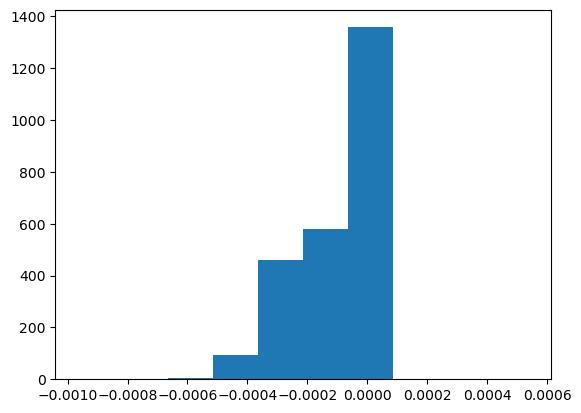

In [27]:
from collections import Counter

plt.hist(s_state_to_plot[:,:,2].reshape(-1))

<Figure size 1600x600 with 0 Axes>

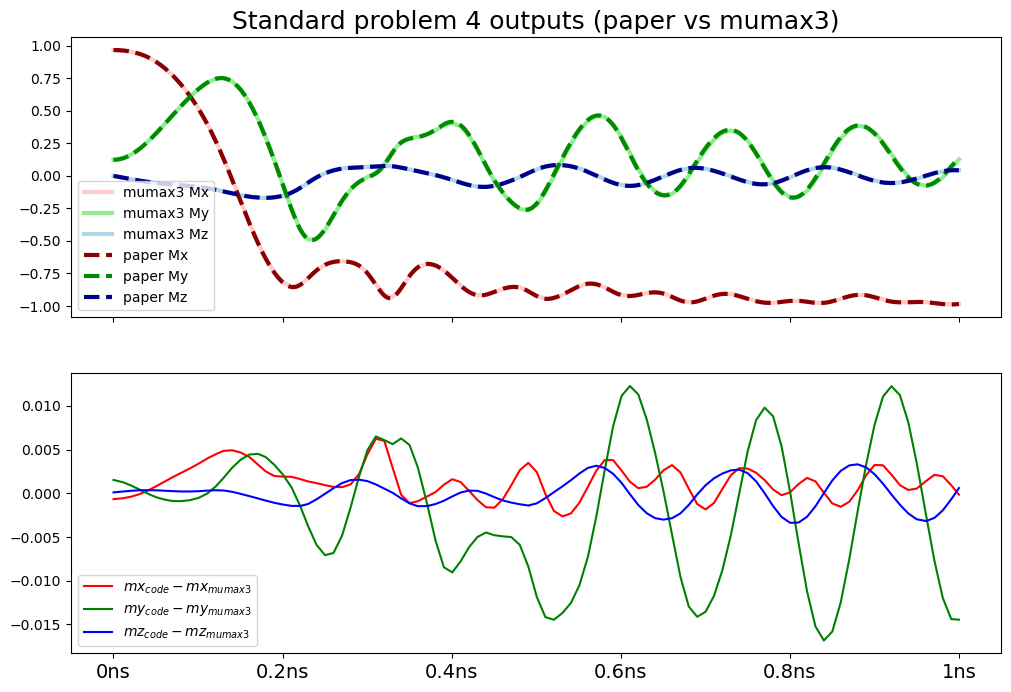

In [228]:
def readMxyz(filename, every=1):
    ts, mxs, mys, mzs = [], [], [], []
    with open(filename) as f:
        lines = f.readlines()
        for i,line in enumerate(lines[1:]):
            if i % every == 0:
                data = line.split()
                ts.append(float(data[0]))
                mxs.append(float(data[1]))
                mys.append(float(data[2]))
                mzs.append(float(data[3]))


    return ts, mxs, mys, mzs


lw = 3
ts, mxs, mys, mzs = readMxyz(os.path.join("eval_data", "table.txt"))
ts_c, mxs_c, mys_c, mzs_c = readMxyz(os.path.join("data", "sp4_original.dat"))

ts_c = np.array(ts_c) * 1e-9

diff_mx, diff_my, diff_mz = [], [], [] 
diff_ts = []

for i, _t in enumerate(ts):
    idx = (np.abs(ts_c - _t)).argmin()
    diff_ts.append(ts_c[idx] - _t)
    mx_mumax3, my_mumax3, mz_mumax3 = mxs[i], mys[i], mzs[i]
    mx_code, my_code, mz_code = mxs_c[idx], mys_c[idx], mzs_c[idx]

    diff_mx.append(mx_mumax3 - mx_code)
    diff_my.append(my_mumax3 - my_code)
    diff_mz.append(mz_mumax3 - mz_code)
    

plt.figure(figsize=(16,6))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,8))

ax1.set_title("Standard problem 4 outputs (paper vs mumax3)", fontsize=18)
ax1.plot(ts, mxs, label="mumax3 Mx", linewidth=lw, color="#ffcccb")
ax1.plot(ts, mys, label="mumax3 My", linewidth=lw, color="#90EE90")
ax1.plot(ts, mzs, label="mumax3 Mz", linewidth=lw, color="#ADD8e6")

ax1.plot(ts_c, mxs_c, "--", linewidth=lw, label="paper Mx", color="#8B0000")
ax1.plot(ts_c, mys_c, "--", linewidth=lw, label="paper My", color="#008B00")
ax1.plot(ts_c, mzs_c, "--", linewidth=lw, label="paper Mz", color="#00008B")

ax2.plot(ts, diff_mx, label="$mx_{code} - mx_{mumax3}$", color="red")
ax2.plot(ts, diff_my, label="$my_{code} - my_{mumax3}$", color="green")
ax2.plot(ts, diff_mz, label="$mz_{code} - mz_{mumax3}$", color="blue")

ax2.set_xticks([0e-9, 0.2e-9, 0.4e-9, 0.6e-9, 0.8e-9, 1e-9], ["0ns", "0.2ns", "0.4ns", "0.6ns", "0.8ns", "1ns"], fontsize=14)
ax1.set_yticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],fontsize=14)

plt.savefig(f"images/M_orignal_code.png")
ax1.legend()
ax2.legend()
plt.show()

# Calculation of demagnetization tensor

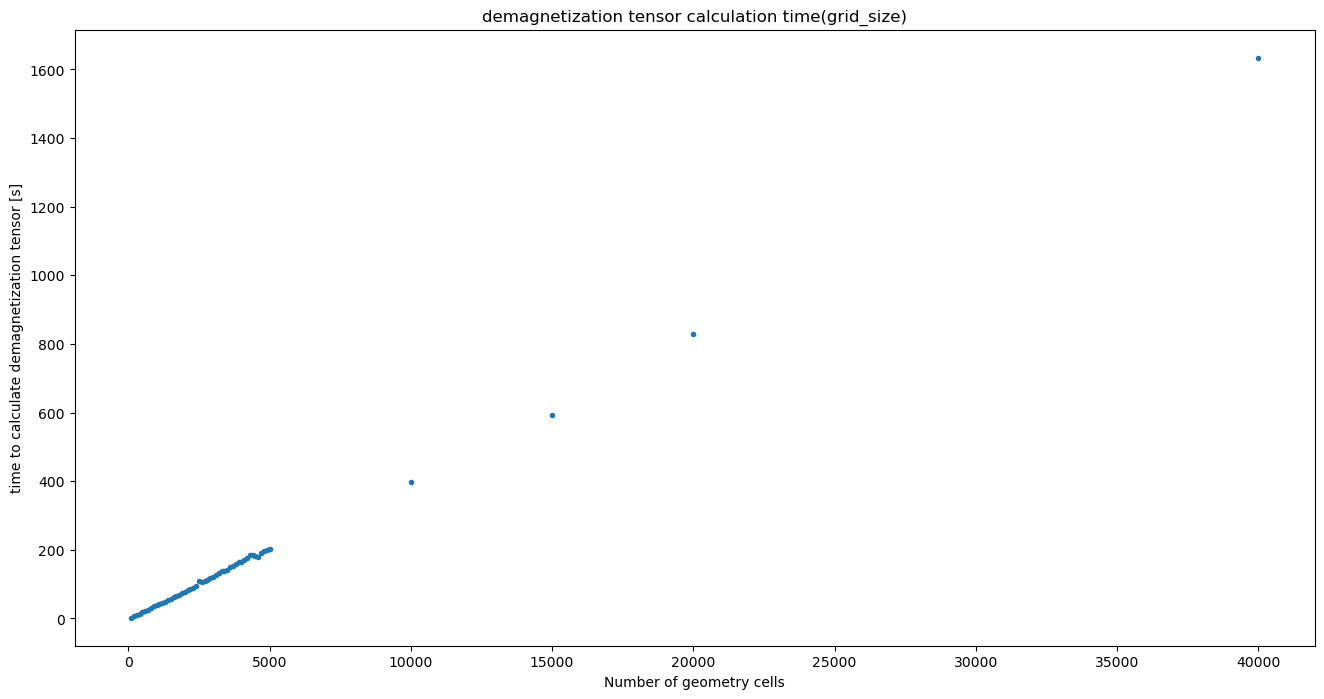

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
grid_size = []
times = []

with open("demag_tensor_calc_data.txt") as f:
    for line in f:
        gs,h,m,s = line.split()
        gs = float(gs)
        #print(m,s)
        m = float(m[:-1])
        s = float(s[:-1])

        grid_size.append(gs)
        times.append(60 * m + s)

plt.figure(figsize=(16, 8))
plt.title("demagnetization tensor calculation time(grid_size)")
plt.plot(grid_size, times, ".")
plt.xlabel("Number of geometry cells")
plt.ylabel("time to calculate demagnetization tensor [s]")
plt.show()

In [ ]:
import numpy as np
a, b = np.polyfit(np.array(grid_size), np.array(times), 1)

: 

: 

# Skyrmion

In [7]:
def plot_skyrmion(data):
    s_state_to_plot = data[::-1, :, 0, :]

    plt.imshow(1-s_state_to_plot[::-1,:,2].T, cmap="bwr")
    plt.show()

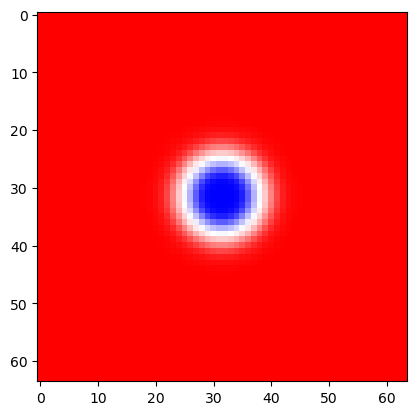

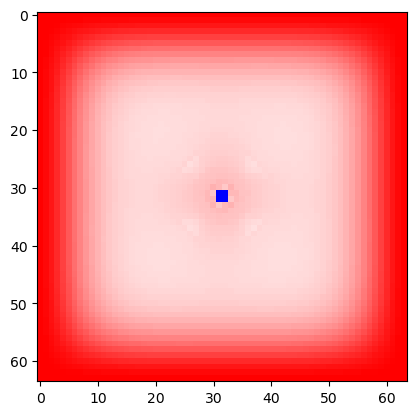

In [10]:
before_relaxation =  np.load(os.path.join("solver_skyrmion", "noDmi_before_relaxation.npy"))
plot_skyrmion(before_relaxation)
after_1ns_noDMI =  np.load(os.path.join("solver_skyrmion", "noDMI_after_relaxation.npy"))
plot_skyrmion(after_1ns_noDMI)

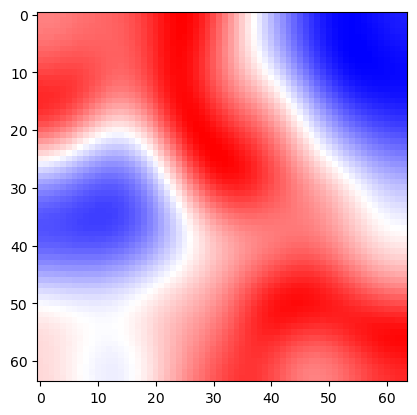

In [12]:
after_1ns_DMI =  np.load(os.path.join("solver_skyrmion", "sk_extra_phys_after_1ns.npy"))
plot_skyrmion(after_1ns_DMI)